In [4]:
#from MuZeroParallel import MuZero as MuZeroP

from MuZero import MuZero

from GridWorldOption import GridWorldOption


from GridWorld import GridWorld

from mcts.MCTS import MCTS
import numpy as np
import matplotlib.pyplot as plt

from random import choice
from copy import deepcopy
import time

import pickle
import pandas as pd

In [5]:
options = [
    GridWorldOption(0),
    GridWorldOption(1),
    GridWorldOption(2),
    GridWorldOption(3),
]

with open('./maps/door.map') as f:
    the_map = f.read()

In [6]:
env = GridWorld(the_map, 1000)
mu = MuZero(env, options)

start = time.time()
returns = mu.learn(1000, 40)
end = time.time()
mu.save('models/door.pickle')

 38%|███████████████████████████████████████████████████████████████████████████▋                                                                                                                          | 382/1000 [00:44<01:11,  8.64it/s]


KeyboardInterrupt: 

In [5]:
with open('results/den204_hard_2.pickle', 'wb') as f:
    pickle.dump(returns, f)

In [5]:
mu.load('models/den204_hard_2.pickle')

env = GridWorld(the_map, 2000)
env.reset()

total = mu.play(env, 40)
    
print(total)

-25.0


In [6]:
env = GridWorld(the_map, 2000)
env.reset()

total_return = 0
done = False

states = []
while not done:
    s0 = mu.h.forward(env)

    mcts = MCTS(s0, mu.f, mu.g, mu.options)
    pi = mcts.run_sim(40)

    opt = np.random.choice(mu.options, 1, p=pi)[0]
    action = opt.action
    
    s, r, done = env.step(action)
    states.append(s)
    total_return += r

print(total_return)

-27.0


In [7]:
with open('./maps/door.map') as f:
    env_map = f.read()
    
env_map = env_map.split('\n')[4:]


grid = np.zeros((len(env_map), len(env_map[0])))
for i in range(len(env_map)):
    for j in range(len(env_map[0])):
        if env_map[i][j] != '.':
            grid[i][j] = -1
        else:
            grid[i][j] = 0

In [8]:
mini = min(mu.f.v_table.values())
maxi = max(mu.f.v_table.values())
for k, v in mu.f.v_table.items():
    grid[k] = (v - mini)/(maxi-mini)

[]

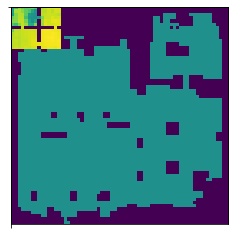

In [9]:
_, ax = plt.subplots()
ax.imshow(grid)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-0.5, 0, 1))
ax.set_yticks(np.arange(-0.5, 0, 1))

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_title('')

ax.plot()

In [10]:
play_grid = deepcopy(grid)

In [11]:
for s in states:
    play_grid[s] = 2

[]

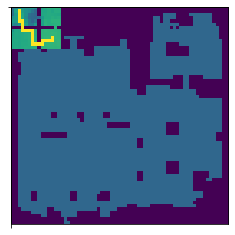

In [12]:
_, ax = plt.subplots()
ax.imshow(play_grid)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-0.5, 0, 1))
ax.set_yticks(np.arange(-0.5, 0, 1))

ax.set_yticklabels([])
ax.set_xticklabels([])

ax.set_title('')

ax.plot()

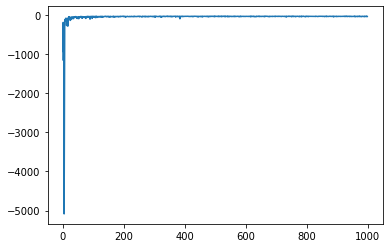

In [13]:
plt.plot(returns)

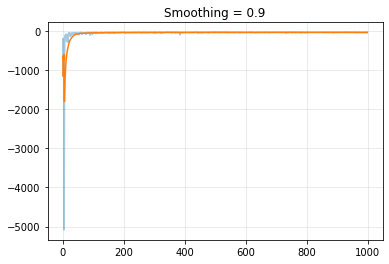

In [14]:
df = pd.DataFrame(data = {'value': np.array(returns[0:1000])})

SMOOTHING = 0.9
smooth = df.ewm(alpha=(1 - SMOOTHING)).mean()


plt.plot(df["value"], alpha=0.4)
plt.plot(smooth["value"])
plt.title("Smoothing = {}".format(SMOOTHING))
plt.grid(alpha=0.3)

plt.show()

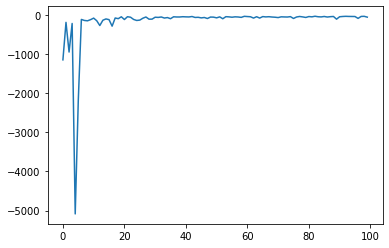

In [16]:
plt.plot(returns[0:100])

In [22]:
options = [
    GridWorldOption(0),
    GridWorldOption(1),
    GridWorldOption(2),
    GridWorldOption(3),
]


#with open('./maps/door.map') as f:
with open('./maps/den204d_hard.map') as f:
    the_map = f.read()

#env = GridWorld(the_map, 2000)
mup = MuZeroP(options, GridWorld, the_map, 10000)

start = time.time()
returns = mup.learn(500, 40)
end = time.time()
mup.save('models/den204d_hard_parallel.pickle')

Starting training by saving current weights
Finished saving weights weights
Started learning
Triggered remote train
Starting selfplay
(pid=8235) Running game 2
(pid=8235) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8242) Running game 6
(pid=8242) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8245) Running game 3
(pid=8237) Running game 1
(pid=8237) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8243) Running game 5
(pid=8243) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8236) Running game 0
(pid=8236) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8240) Running game 7
(pid=8240) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8244) Running game 4
(pid=8244) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8245) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8238) Running game 8
(pid=8238) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8246) Running game 9
(pid=8246) [1 steps] 

(pid=8679) Running game 44
(pid=8679) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=9437) Finished calculating Z
(pid=8682) Running game 45
(pid=8682) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8246) Finished calculating Z
(pid=8246) Running game 46
(pid=8246) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8244) Finished calculating Z
(pid=8244) Running game 47
(pid=8244) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8245) Updating Z ...
(pid=8245) Finished calculating Z
(pid=8245) Running game 48
(pid=8245) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=8678) Updating Z ...
(pid=8237) Updating Z ...
(pid=8678) Finished calculating Z
(pid=8678) Running game 49
(pid=8678) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8682) Updating Z ...
(pid=10127) Updating Z ...
(pid=8236) Updating Z ...
(pid=10135) Updating Z ...
(pid=9353) Updating Z ...
(pid=8246) Updating Z ...
(pid=8237) Finished calculating Z
(pid=824

(pid=13087) Updating Z ...
(pid=11205) Updating Z ...
(pid=12100) Updating Z ...
(pid=8245) Finished calculating Z
(pid=8678) Updating Z ...
(pid=8245) Running game 84
(pid=8245) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=10979) Updating Z ...
(pid=11750) Finished calculating Z
(pid=11750) Running game 85
(pid=11750) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=12865) Finished calculating Z
(pid=14082) Running game 86
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=11754) Finished calculating Z
(pid=12865) Running game 87
(pid=12865) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=11608) Finished calculating Z
(pid=11754) Running game 88
(pid=11754) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8682) Updating Z ...
(pid=13087) Finished calculating Z
(pid=13087) Running game 89
(pid=13087) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=12100) Finished calculating Z
(pid=11205) Finished calculating Z

(pid=14129) Updating Z ...
(pid=15096) Finished calculating Z
(pid=15096) Running game 124
(pid=15096) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=15096) 
(pid=16883) Updating Z ...
(pid=8244) Updating Z ...
(pid=16636) Finished calculating Z
(pid=16636) Running game 125
(pid=16636) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=16879) Finished calculating Z
(pid=18004) Running game 126
(pid=18004) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14129) Finished calculating Z
(pid=14129) Running game 127
(pid=14129) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=17395) Updating Z ...
(pid=16883) Finished calculating Z
(pid=16883) Running game 128
(pid=16883) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8244) Finished calculating Z
(pid=18237) Running game 129
(pid=18237) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14082) Updating Z ...
(pid=17395) Finished calculating Z
(pid=17395) Running game 130
(pid=17395

(pid=16883) Updating Z ...
(pid=19853) Finished calculating Z
(pid=19853) Running game 163
(pid=19853) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14129) Finished calculating Z
(pid=14129) Running game 164
(pid=14129) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=15096) Finished calculating Z
(pid=15096) Running game 165
(pid=15096) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=16883) Finished calculating Z
(pid=16883) Running game 166
(pid=16883) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14082) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 167
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=18004) Updating Z ...
(pid=18004) Finished calculating Z
(pid=18004) Running game 168
(pid=18004) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=18834) Updating Z ...
(pid=11750) Updating Z ...
(pid=11754) Updating Z ...
(pid=18237) Updating Z ...
(pid=21288) Updating Z ...
(pid

(pid=14082) Updating Z ...
(pid=25484) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 203
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14126) Updating Z ...
(pid=25233) Updating Z ...
(pid=25641) Updating Z ...
(pid=18004) Updating Z ...
(pid=25484) Finished calculating Z
(pid=25484) Running game 204
(pid=25484) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14126) Finished calculating Z
(pid=26381) Running game 205
(pid=26381) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=24127) Updating Z ...
(pid=15096) Updating Z ...
(pid=25233) Finished calculating Z
(pid=25233) Running game 206
(pid=25233) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=25641) Finished calculating Z
(pid=26576) Running game 207
(pid=26576) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=18004) Finished calculating Z
(pid=25641) Running game 208
(pid=23846) Updating Z ...
(pid=25641) [1 steps] [state (3, 49)] [goal

(pid=26381) Updating Z ...
(pid=28951) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 242
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=26381) Finished calculating Z
(pid=26381) Running game 243
(pid=26381) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=28951) Finished calculating Z
(pid=28951) Running game 244
(pid=28951) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=15096) Updating Z ...
(pid=24127) Updating Z ...
(pid=15096) Finished calculating Z
(pid=15096) Running game 245
(pid=15096) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=24127) Finished calculating Z
(pid=24127) Running game 246
(pid=24127) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=28062) Updating Z ...
(pid=25997) Updating Z ...
(pid=29741) Updating Z ...
(pid=26829) Updating Z ...
(pid=28062) Finished calculating Z
(pid=28062) Running game 247
(pid=28062) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid

(pid=15096) Running game 281
(pid=15096) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=24127) Updating Z ...
(pid=25997) Updating Z ...
(pid=24127) Finished calculating Z
(pid=24127) Running game 282
(pid=24127) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=31282) Updating Z ...
(pid=2330) Updating Z ...
(pid=28062) Updating Z ...
(pid=29773) Updating Z ...
(pid=25997) Finished calculating Z
(pid=25997) Running game 283
(pid=25997) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=2482) Updating Z ...
(pid=25484) Updating Z ...
(pid=31282) Finished calculating Z
(pid=31282) Running game 284
(pid=31282) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=2330) Finished calculating Z
(pid=3762) Running game 285
(pid=3762) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=28062) Finished calculating Z
(pid=28062) Running game 286
(pid=28062) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=29773) Finished calculating Z
(pid=2977

(pid=25997) Finished calculating Z
(pid=25997) Running game 320
(pid=6625) Finished calculating Z
(pid=25997) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=6625) Running game 321
(pid=6625) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=6894) Finished calculating Z
(pid=5207) Finished calculating Z
(pid=6894) Running game 322
(pid=6894) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=5207) Running game 323
(pid=5207) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=5056) Finished calculating Z
(pid=5056) Running game 324
(pid=5056) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=3762) Finished calculating Z
(pid=3762) Running game 325
(pid=3762) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14082) Updating Z ...
(pid=28951) Updating Z ...
(pid=7250) Updating Z ...
(pid=4475) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 326
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]

(pid=9726) Finished calculating Z
(pid=12773) Running game 361
(pid=12773) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14082) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 362
(pid=14082) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=28951) Updating Z ...
(pid=7250) Updating Z ...
(pid=11563) Updating Z ...
(pid=8710) Updating Z ...
(pid=28951) Finished calculating Z
(pid=28951) Running game 363
(pid=28951) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=7250) Finished calculating Z
(pid=12895) Running game 364
(pid=12895) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=8710) Finished calculating Z
(pid=7250) Running game 365
(pid=7250) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=11563) Finished calculating Z
(pid=8710) Running game 366
(pid=8710) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=10756) Updating Z ...
(pid=2482) Updating Z ...
(pid=25997) Updating Z ...
(pid=10756) Fi

(pid=28951) Finished calculating Z
(pid=28951) Running game 400
(pid=28951) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=2482) Updating Z ...
(pid=14505) Finished calculating Z
(pid=16664) Running game 401
(pid=16664) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=15663) Finished calculating Z
(pid=15663) Running game 402
(pid=15663) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=10756) Finished calculating Z
(pid=16849) Running game 403
(pid=16849) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=2482) Finished calculating Z
(pid=2482) Running game 404
(pid=2482) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=25997) Updating Z ...
(pid=3762) Updating Z ...
(pid=6894) Updating Z ...
(pid=25997) Finished calculating Z
(pid=25997) Running game 405
(pid=25997) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=12773) Updating Z ...
(pid=11049) Updating Z ...
(pid=3762) Finished calculating Z
(pid=3762) Running game 406
(p

(pid=28951) Finished calculating Z
(pid=28951) Running game 440
(pid=28951) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=25997) Finished calculating Z
(pid=25997) Running game 441
(pid=25997) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=18455) Updating Z ...
(pid=6894) Updating Z ...
(pid=17389) Updating Z ...
(pid=18455) Finished calculating Z
(pid=18455) Running game 442
(pid=18455) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=6894) Finished calculating Z
(pid=6894) Running game 443
(pid=6894) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=17389) Finished calculating Z
(pid=22314) Running game 444
(pid=22314) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=11049) Updating Z ...
(pid=14082) Updating Z ...
(pid=11049) Finished calculating Z
(pid=11049) Running game 445
(pid=11049) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=14082) Finished calculating Z
(pid=14082) Running game 446
(pid=14082) [1 steps] [st

(pid=26348) Running game 479
(pid=26348) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=22314) Finished calculating Z
(pid=22314) Running game 480
(pid=22314) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=11049) Finished calculating Z
(pid=11049) Running game 481
(pid=11049) [1 steps] [state (3, 50)] [goal (64, 17)] [h_dist 94]
(pid=24518) Updating Z ...
(pid=14082) Updating Z ...
(pid=25492) Updating Z ...
(pid=22619) Updating Z ...
(pid=24518) Finished calculating Z
(pid=24518) Running game 482
(pid=24518) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=25997) Updating Z ...
(pid=16664) Updating Z ...
(pid=26170) Updating Z ...
(pid=14082) Finished calculating Z
(pid=14082) Running game 483
(pid=14082) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=25492) Finished calculating Z
(pid=25492) Running game 484
(pid=25492) [1 steps] [state (3, 49)] [goal (64, 17)] [h_dist 93]
(pid=22619) Finished calculating Z
(pid=22619) Running game 485
(p